In [306]:
import numpy as np
import copy
import xlrd
import matplotlib.pyplot as plt
loc = ("/home/kaushik/HW02/rna_seq_counts.xls")
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 

In [307]:
def plots2(v1, v2, label1, label2):
    plt.scatter(v1,v2)
    x = np.linspace(min(v1), max(v1), 1000)
    plt.plot(x,x,'r')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.show()

In [308]:
dmso1 = []
dmso2 = []
plx1 = []
plx2 = []

for i in range(1,sheet.nrows):
    flag = 0
    for j in range(2,6):
        if sheet.cell_value(i,j) > 0:
            flag = 1
            break
    if flag == 1:
        dmso1.append(sheet.cell_value(i,2) + 1)
        dmso2.append(sheet.cell_value(i,3) + 1)
        plx1.append(sheet.cell_value(i,4) + 1)
        plx2.append(sheet.cell_value(i,5) + 1)

In [309]:
dmso1 = np.log2(dmso1)
dmso2 = np.log2(dmso2)
plx1 = np.log2(plx1)
plx2 = np.log2(plx2)

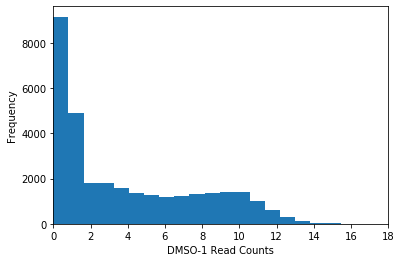

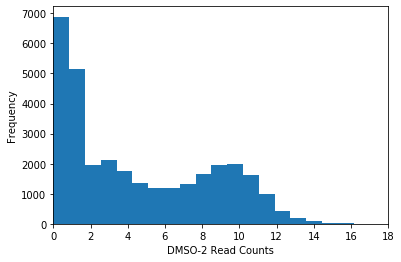

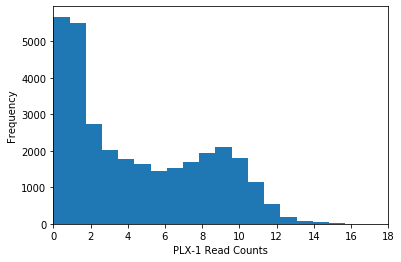

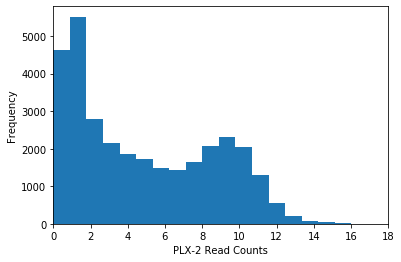

In [315]:
### Part 1
plt.hist(dmso1, 20)
plt.xlim([0, 18])
plt.xlabel('DMSO-1 Read Counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(dmso2, 20)
plt.xlim([0, 18])
plt.xlabel('DMSO-2 Read Counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(plx1, 20)
plt.xlim([0, 18])
plt.xlabel('PLX-1 Read Counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(plx2, 20)
plt.xlim([0, 18])
plt.xlabel('PLX-2 Read Counts')
plt.ylabel('Frequency')
plt.show()

In [279]:
### Part 2

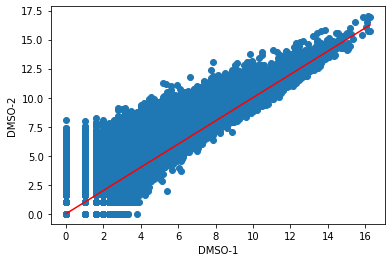

In [280]:
plots2(dmso1, dmso2, 'DMSO-1', 'DMSO-2')

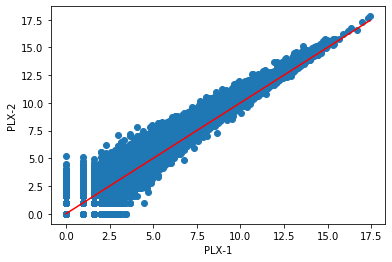

In [281]:
plots2(plx1, plx2, 'PLX-1', 'PLX-2')

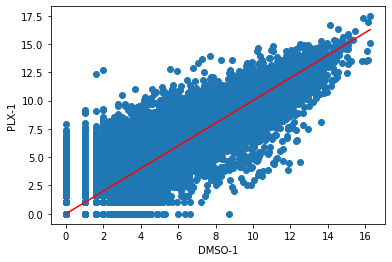

In [282]:
plots2(dmso1, plx1, 'DMSO-1', 'PLX-1')

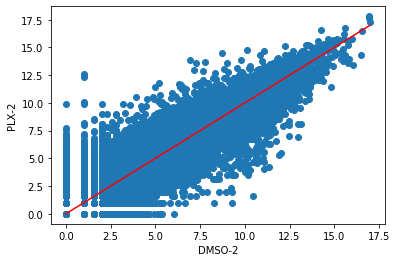

In [283]:
plots2(dmso2, plx2, 'DMSO-2', 'PLX-2')

In [284]:
### Part 3: Quantile normalization

In [304]:
def quantile_norm(v1, v2):
    v1sort = np.sort(v1)
    v2sort = np.sort(v2)
    arg1 = []
    arg2 = []
    for i in range(len(v1)):
        arg1.append(np.searchsorted(v1sort, v1[i]))
        
    for i in range(len(v2)):
        arg2.append(np.searchsorted(v2sort, v2[i]))
        
    v = []
    for i in range(len(v1)):
        v.append(0.5*(2.**v1sort[i] + 2.**v2sort[i]))
    v = np.log2(v)
    
    v1ret = []
    v2ret = []
    for i in range(len(dmso1)):
        v1ret.append(v[arg1[i]])
        v2ret.append(v[arg2[i]])
        
    return (v1ret, v2ret)

In [294]:
def quantile_norm(dmso1, dmso2, plx1, plx2):
    dmso1sort = np.sort(dmso1)
    dmso2sort = np.sort(dmso2)
    plx1sort = np.sort(plx1)
    plx2sort = np.sort(plx2)
    arg1 = []
    arg2 = []
    arg3 = []
    arg4 = []
    for i in range(len(dmso1)):
        arg1.append(np.searchsorted(dmso1sort, dmso1[i]))
        
    for i in range(len(dmso1)):
        arg2.append(np.searchsorted(dmso2sort, dmso2[i]))
        
    for i in range(len(dmso1)):
        arg3.append(np.searchsorted(plx1sort, plx1[i]))
        
    for i in range(len(dmso1)):
        arg4.append(np.searchsorted(plx2sort, plx2[i]))
                
    dmso = []
    for i in range(len(dmso1)):
        dmso.append(0.25*(2.**dmso1sort[i] + 2.**dmso2sort[i] + 2.**plx1sort[i] + 2.**plx2sort[i]))
    dmso = np.log2(dmso)

    dmso1ret = []
    dmso2ret = []
    plx1ret = []
    plx2ret = []
    for i in range(len(dmso1)):
        dmso1ret.append(dmso[arg1[i]])
        dmso2ret.append(dmso[arg2[i]])
        plx1ret.append(dmso[arg3[i]])
        plx2ret.append(dmso[arg4[i]])
        
    return (dmso1ret, dmso2ret, plx1ret, plx2ret)

In [297]:
(dmso1qn, dmso2qn, plx1qn, plx2qn) = quantile_norm(dmso1, dmso2, plx1, plx2)

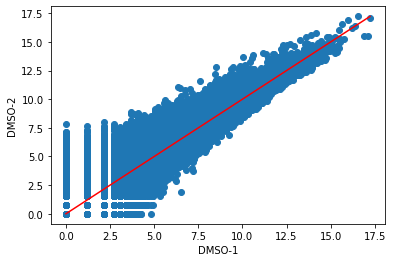

In [298]:
plots2(dmso1qn, dmso2qn, 'DMSO-1', 'DMSO-2')

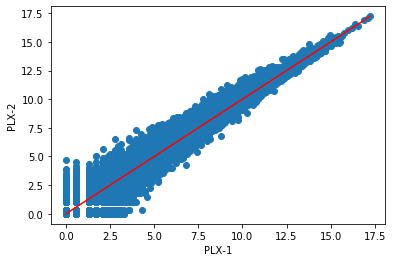

In [299]:
plots2(plx1qn, plx2qn, 'PLX-1', 'PLX-2')

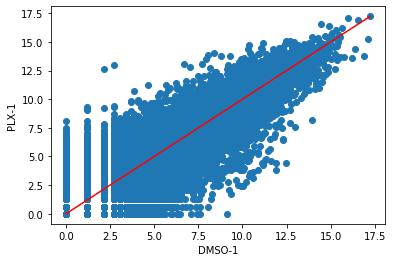

In [300]:
plots2(dmso1qn, plx1qn, 'DMSO-1', 'PLX-1')

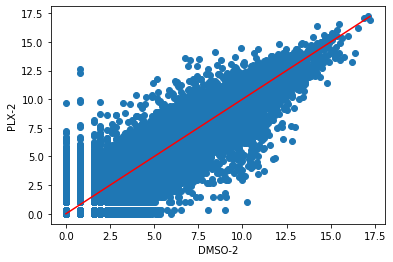

In [301]:
plots2(dmso2qn, plx2qn, 'DMSO-2', 'PLX-2')

In [330]:
### Part 5
loc1 = ("/home/kaushik/HW02/fold_change.xls")
wb1 = xlrd.open_workbook(loc1) 
sheet1 = wb1.sheet_by_index(0) 

fc = []
pval = []
genename = []

for i in range(1,sheet1.nrows):
    genename.append(sheet1.cell_value(i,1))
    fc.append(sheet1.cell_value(i,2))
    pval.append(sheet1.cell_value(i,3))

MOXD1
COL8A1
MKI67
ANGPTL7
DCT
DTL
A2M
BUB1B
CENPF
RRM2


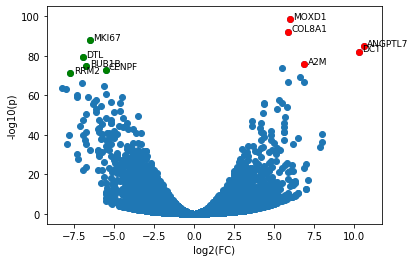

In [331]:
pval = -np.log10(pval)
plt.scatter(fc, pval)
plt.ylabel('-log10(p)')
plt.xlabel('log2(FC)')

arg = np.argsort(pval)

countpos = 0
countneg = 0
for i in range(len(pval)-1, -1, -1):
    if countpos >= 5 and countneg >=5:
        break
        
    if fc[arg[i]] > 0:
        if countpos >= 5:
            continue
        countpos += 1
        plt.scatter(fc[arg[i]], pval[arg[i]], color = 'r')
        plt.text(fc[arg[i]]+0.2, pval[arg[i]]+0.2, genename[arg[i]], fontsize=9)
        print(genename[arg[i]])
    else:
        if countneg >= 5:
            continue
        countneg += 1
        plt.scatter(fc[arg[i]], pval[arg[i]], color = 'g')
        plt.text(fc[arg[i]]+0.2, pval[arg[i]]+0.2, genename[arg[i]], fontsize=9)
        print(genename[arg[i]])
    
plt.show()

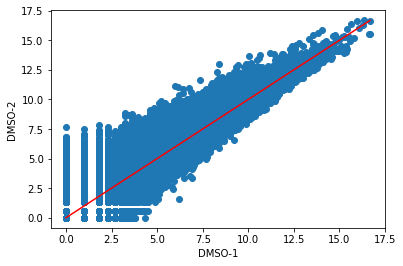

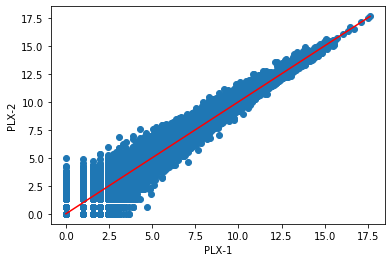

In [305]:
(dmso1qn, dmso2qn) = quantile_norm(dmso1, dmso2)
(plx1qn, plx2qn) = quantile_norm(plx1, plx2)
plots2(dmso1qn, dmso2qn, 'DMSO-1', 'DMSO-2')
plots2(plx1qn, plx2qn, 'PLX-1', 'PLX-2')